<font size="6">Introduction to supervised machine learning II</font>

Francisco Förster Burón, CMM-U.Chile / MAS


**Summary intro to supervised classification**

* Different diagnostics to measure the quality of a classifier beyond its accuracy.

* Recall and precision and variations the key diagnostics, F1 and F$_\beta$ harmonic mean averages (incl. weights).

* Macro and micro averages can be used for all diagnostics

* ROC and DET curves allows visualizing trade--off between false positives and false negatives

* Area under the curve measures overall quality.

* Training, validation and test sets important to allow model selection without overfitting (knowledge leaking)

* Different techniques to avoid very small validation and test sets: variations on K-fold cross-validation (stratified important for unbalanced sets)

* Training with unbalanced sets may require weighting the sample

* Remember that you can train with the full dataset after all the previous tests in order to build a classifier which will be used in some other data

**Bibliography**: 

Statistics, Data Mining, and Machine Learning in Astronomy: A Practical Python Guide for the Analysis of Survey Data (Princeton Series in Modern Observational Astronomy), Željko Ivezic, Andrew J. Connolly, Jacob T VanderPlas, Alexander Gray

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-SDSS-QSOs-and-stars-datasets" data-toc-modified-id="The-SDSS-QSOs-and-stars-datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The SDSS QSOs and stars datasets</a></span><ul class="toc-item"><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Train test split</a></span></li></ul></li><li><span><a href="#Define-some-functions" data-toc-modified-id="Define-some-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Define some functions</a></span></li><li><span><a href="#Joint-probability-modelling-classification" data-toc-modified-id="Joint-probability-modelling-classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Joint probability modelling classification</a></span><ul class="toc-item"><li><span><a href="#Bayes-rule" data-toc-modified-id="Bayes-rule-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Bayes rule</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#Gaussian-Naive-Bayes-Classifier" data-toc-modified-id="Gaussian-Naive-Bayes-Classifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Gaussian Naive Bayes Classifier</a></span></li><li><span><a href="#Gaussian-Bayes-Classifier" data-toc-modified-id="Gaussian-Bayes-Classifier-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Gaussian Bayes Classifier</a></span></li><li><span><a href="#Linear-Discriminant-Analysis-(LDA)" data-toc-modified-id="Linear-Discriminant-Analysis-(LDA)-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Linear Discriminant Analysis (LDA)</a></span></li><li><span><a href="#Quadratic-Discriminant-Analysis-(QDA)" data-toc-modified-id="Quadratic-Discriminant-Analysis-(QDA)-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Quadratic Discriminant Analysis (QDA)</a></span></li><li><span><a href="#Gaussian-Mixture-Model" data-toc-modified-id="Gaussian-Mixture-Model-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Gaussian Mixture Model</a></span></li><li><span><a href="#K-nearest-neighbor-classifier" data-toc-modified-id="K-nearest-neighbor-classifier-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>K-nearest neighbor classifier</a></span></li></ul></li><li><span><a href="#Discriminative-classification" data-toc-modified-id="Discriminative-classification-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Discriminative classification</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Support-vector-machine" data-toc-modified-id="Support-vector-machine-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Support vector machine</a></span><ul class="toc-item"><li><span><a href="#Strict-linear-separation" data-toc-modified-id="Strict-linear-separation-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Strict linear separation</a></span></li><li><span><a href="#Soft-margin-separation" data-toc-modified-id="Soft-margin-separation-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Soft margin separation</a></span></li><li><span><a href="#Non-linear-extension" data-toc-modified-id="Non-linear-extension-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Non linear extension</a></span></li></ul></li></ul></li><li><span><a href="#Decision-trees" data-toc-modified-id="Decision-trees-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Decision trees</a></span><ul class="toc-item"><li><span><a href="#Tree-splitting" data-toc-modified-id="Tree-splitting-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Tree splitting</a></span><ul class="toc-item"><li><span><a href="#Other-classification-criteria" data-toc-modified-id="Other-classification-criteria-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Other classification criteria</a></span></li><li><span><a href="#Stopping-criteria" data-toc-modified-id="Stopping-criteria-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Stopping criteria</a></span></li></ul></li><li><span><a href="#Building-the-tree" data-toc-modified-id="Building-the-tree-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Building the tree</a></span></li><li><span><a href="#Bagging,-Random-forests-and-boosting" data-toc-modified-id="Bagging,-Random-forests-and-boosting-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Bagging, Random forests and boosting</a></span><ul class="toc-item"><li><span><a href="#Bagging" data-toc-modified-id="Bagging-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Bagging</a></span></li><li><span><a href="#Random-forests" data-toc-modified-id="Random-forests-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Random forests</a></span><ul class="toc-item"><li><span><a href="#Out-of-bag-metrics" data-toc-modified-id="Out-of-bag-metrics-5.3.2.1"><span class="toc-item-num">5.3.2.1&nbsp;&nbsp;</span>Out-of-bag metrics</a></span></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-5.3.2.2"><span class="toc-item-num">5.3.2.2&nbsp;&nbsp;</span>Feature importance</a></span></li></ul></li><li><span><a href="#Boosting" data-toc-modified-id="Boosting-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Boosting</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-5.3.4"><span class="toc-item-num">5.3.4&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#Grid-search" data-toc-modified-id="Grid-search-5.3.5"><span class="toc-item-num">5.3.5&nbsp;&nbsp;</span>Grid search</a></span></li></ul></li><li><span><a href="#Extreme-Gradient-Boosting-(xgboost)" data-toc-modified-id="Extreme-Gradient-Boosting-(xgboost)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Extreme Gradient Boosting (xgboost)</a></span></li><li><span><a href="#Light-Gradient-Boosting-Microsoft-(lightGBM)" data-toc-modified-id="Light-Gradient-Boosting-Microsoft-(lightGBM)-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Light Gradient Boosting Microsoft (lightGBM)</a></span><ul class="toc-item"><li><span><a href="#Transform-labels-to-numbers-with-LabelEncoder" data-toc-modified-id="Transform-labels-to-numbers-with-LabelEncoder-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Transform labels to numbers with LabelEncoder</a></span></li></ul></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li><li><span><a href="#Comparison-of-methods" data-toc-modified-id="Comparison-of-methods-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Comparison of methods</a></span></li><li><span><a href="#Imbalanced-data-sets" data-toc-modified-id="Imbalanced-data-sets-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Imbalanced data sets</a></span><ul class="toc-item"><li><span><a href="#Reload-data-set" data-toc-modified-id="Reload-data-set-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Reload data set</a></span></li><li><span><a href="#SMOTE:-Synthetic-Minority-Over-sampling-Technique" data-toc-modified-id="SMOTE:-Synthetic-Minority-Over-sampling-Technique-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>SMOTE: Synthetic Minority Over-sampling Technique</a></span></li><li><span><a href="#ADASYN" data-toc-modified-id="ADASYN-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>ADASYN</a></span></li><li><span><a href="#LightGBM-using-the-resampled-dataset" data-toc-modified-id="LightGBM-using-the-resampled-dataset-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>LightGBM using the resampled dataset</a></span></li></ul></li></ul></div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

Load some libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
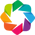

In [4]:
import holoviews as hv
from holoviews.operation.datashader import datashade, dynspread
import datashader as ds
from matplotlib import cm
hv.extension('bokeh')

# The SDSS QSOs and stars datasets

Download files SDSS_stars.csv and SDSS_QSO.dat from https://astrostatistics.psu.edu/MSMA/datasets/

In [28]:
stars = pd.read_csv("data/SDSS_stars.csv")
stars.head()

u_mag      g_mag      r_mag      i_mag      z_mag          ra  \
0  20.533161  17.968031  16.827314  16.373095  16.091063  190.001261   
1  18.894476  17.674576  17.208895  17.033516  16.972940  190.002330   
2  18.290901  17.022612  16.625498  16.431305  16.399673  190.012240   
3  19.784182  17.820679  17.003235  16.721306  16.541569  190.012912   
4  18.874607  17.638632  17.120625  16.907972  16.849592  190.012951   

         dec  
0  21.910620  
1  21.874641  
2  21.702999  
3  23.667913  
4  24.797507

In [29]:
stars.shape

(5000, 7)

In [30]:
QSOs = pd.read_csv("data/SDSS_QSO.dat", sep = "\s+", index_col = "SDSS")
QSOs.head()

z   u_mag  sig_u_mag   g_mag  sig_g_mag   r_mag  \
SDSS                                                                       
000006.53+003055.2  1.8227  20.389      0.066  20.468      0.034  20.332   
000008.13+001634.6  1.8365  20.233      0.054  20.200      0.024  19.945   
000009.26+151754.5  1.1986  19.921      0.042  19.811      0.036  19.386   
000009.38+135618.4  2.2400  19.218      0.026  18.893      0.022  18.445   
000009.42-102751.9  1.8442  19.249      0.036  19.029      0.027  18.980   

                    sig_r_mag   i_mag  sig_i_mag   z_mag  sig_z_mag  FIRST  \
SDSS                                                                         
000006.53+003055.2      0.037  20.099      0.041  20.053      0.121    0.0   
000008.13+001634.6      0.032  19.491      0.032  19.191      0.068    0.0   
000009.26+151754.5      0.017  19.165      0.023  19.323      0.069   -1.0   
000009.38+135618.4      0.018  18.331      0.024  18.110      0.033   -1.0   
000009.42-102751.9      0.021  18.791      0.018  18.751      0.047    0.0   

                    ROSAT      Mp  
SDSS                               
000006.53+003055.2   -9.0 -25.100  
000008.13+001634.6   -9.0 -25.738  
000009.26+151754.5   -9.0 -25.085  
000009.38+135618.4   -9.0 -27.419  
000009.42-102751.9   -9.0 -26.459

In [31]:
QSOs.shape

(77429, 14)

Create labels

In [32]:
stars["cat"] = "star"
stars["u-g"] = stars.u_mag - stars.g_mag
stars["g-r"] = stars.g_mag - stars.r_mag
stars["r-i"] = stars.r_mag - stars.i_mag
stars["i-z"] = stars.i_mag - stars.z_mag
QSOs["cat"] = "QSO"
QSOs["u-g"] = QSOs.u_mag - QSOs.g_mag
QSOs["g-r"] = QSOs.g_mag - QSOs.r_mag
QSOs["r-i"] = QSOs.r_mag - QSOs.i_mag
QSOs["i-z"] = QSOs.i_mag - QSOs.z_mag

Create new pandas dataframe with both classes

In [46]:
sel_cols = ["u-g", "g-r", "cat"]
data = pd.concat([stars[sel_cols], QSOs[sel_cols].sample(5000, random_state=1)])
#data = pd.concat([stars[sel_cols], QSOs[sel_cols]])
data["cat"] = data["cat"].astype("category")
data.sample(10)

u-g       g-r   cat
1687                1.797392  0.692928  star
2677                1.182634  0.590393  star
4939                1.373688  0.604406  star
150                 1.118141  0.368919  star
154150.83+054846.2  1.734000  0.170000   QSO
155225.35+055856.5  0.424000  0.268000   QSO
2414                0.971332  0.366936  star
4986                2.599197  1.377588  star
4909                1.177420  0.389149  star
949                 1.173486  0.499873  star

In [47]:
data.describe()

u-g           g-r
count  10000.000000  10000.000000
mean       1.010137      0.414540
std        0.854551      0.365459
min       -2.585000     -0.561000
25%        0.250000      0.151000
50%        0.993799      0.366831
75%        1.494916      0.569775
max        5.645000      4.381000

In [48]:
data.groupby("cat").count()

u-g   g-r
cat             
QSO   5000  5000
star  5000  5000

In [49]:
points = hv.Points(data, kdims=['u-g', 'g-r'])
datashade.x_range=(data["u-g"].quantile(0.001),data["u-g"].quantile(0.995))
datashade.y_range=(data["g-r"].quantile(0.001),data["g-r"].quantile(0.995)); 
datashade.cmap=cm.viridis
dynspread.max_px=100
dynspread.threshold=0.5
dynspread(datashade(points)).opts(width=800, height=500)

:DynamicMap   []
   :RGB   [u-g,g-r]   (R,G,B,A)

In [38]:
points = hv.Points(data, kdims=['u-g', 'g-r'], vdims=['cat'])
datashade.x_range=(data["u-g"].quantile(0.001),data["u-g"].quantile(0.995))
datashade.y_range=(data["g-r"].quantile(0.001),data["g-r"].quantile(0.995)); 
dynspread.max_px=100
dynspread.threshold=0.8
dynspread(datashade(points, aggregator=ds.count_cat('cat'))).opts(width=800, height=500)

/home/fforster/anaconda3/lib/python3.6/site-packages/datashader/utils.py:348: FutureWarning: `Series.cat.categorical` has been deprecated. Use the attributes on 'Series.cat' directly instead.
  ordered=col.cat.categorical.ordered)


:DynamicMap   []
   :RGB   [u-g,g-r]   (R,G,B,A)

## Train test split

Let's try this in the stars vs QSOs dataset

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data[["u-g", "g-r"]], data.cat, test_size=.4, random_state=42)

# Define some functions

In [17]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [19]:
def plot_contours(ax, clf, xx, yy, pos_label, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) == pos_label
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Joint probability modelling classification

## Bayes rule

Given a set of data {${\bf x}$} of N points in D dimensions, such that $x_i^j$ is the $j$th feature of the $i$th point, and a set of discrete labels {$y$} drawn from $K$ classes, we can write the joint probability of point $i$th being in class $k$ and having features ${\bf x_i}$ as:

$\Large p(y_k, {\bf x_i}) =  p(y_k | {\bf x_i}) p({\bf x}_i) = p({\bf x}_i | y_k) p(y_k)$

which implies Bayes theorem:

$\Large p(y_k | {\bf x_i}) = \frac{p({\bf x}_i | y_k) p(y_k)}{p({\bf x}_i)} =  \frac{p({\bf x}_i | y_k) p(y_k)}{\sum_j p({\bf x}_i | y_j) p(y_j)}$

## Naive Bayes

If we make the strong assumption that all attributes are **conditionally** independent we can write:

$\Large p(x^i, x^j | y_k) = p(x^i | y_k) p (x^j | y_k)$,

This can be expressed as:

$\Large p(x^0, x^1, x^2, ... , x^N | y_k) = \prod_j p(x^j | y_k)$

Applying Bayes' rule this can be written as:

$\Large p(y_k | x^0, x^1, x^2, ... , x^N) = \frac{p(x^0, x^1, x^2, ... , x^N | y_k) p(y_k)}{\sum_j p(x^0, x^1, x^2, ... , x^N|y_j) p(y_j)}$

which assuming conditional independence becomes:

$\Large p(y_k | x^0, x^1, x^2, ... , x^N) = \frac{\prod_i p(x^i | y_k) p(y_k)}{\sum_j \prod_i p(x^i | y_j) p(y_j)}$

Using the previous expression we can compute the most likely value of $y$ by maximizinng over $y_k$:

$\Large \hat y = argmax_{y_k} \frac{\prod_i p(x^i | y_k) p(y_k)}{\sum_j \prod_i p(x^i | y_j) p(y_j)} = argmax_{y_k} \frac{\prod_i p_k(x^i) \pi_k}{\sum_j \prod_i p_j(x^i) \pi_j}$

defining 

$\Large p_k(x^i) \equiv p(x^i | y_k)$ and $\Large \pi_k \equiv p(y_k)$

The challenge is then to **determine $p_k(x^i)$ and $\pi_k$ from a training set.**

This is usually done with parametrized models, or more general parametric or non parametric density estimation techniques.

Very simple example: when the features are categorical. For each label $y_k$ in the training set, the maximum likelihood estimate of the probability for feature $x^i$ is the number of objects with a particular value $x^i$ divided by the total number of objects with the same label. The values of $\pi_k$ are the fraction of data with $y = y_k$.

## Gaussian Naive Bayes Classifier

In this case the probabilities $p_k(x^i)$ are modeled as one dimensional normal distribution:

$\Large p_k(x_i) = \frac{1}{\sqrt{2 \pi (\sigma_k^i)^2}} \exp \biggl( -\frac{(x_i - \mu^i_k)^2}{2 (\sigma_k^i)^2}\biggr)$

$\Rightarrow$

Using this model, the maximum likelihood estimator becomes:

$\Large \hat{y} = argmax_{y_k} \biggl[ \ln \pi_k - \frac{1}{2} \sum_1^N \ln \bigg(2 \pi (\sigma_k^i)^2\biggr) + \frac{(x^i - \mu_k^i)^2}{(\sigma_k^i)^2} \biggr]$

*Note error in 9.21

 Example of Gaussian Naive Bayes classification:
 ![](images/NaiveBayes.png)
 ![](images/NaiveBayes_class.png)


In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f1-score:", metrics.f1_score(y_test, y_pred, pos_label="QSO"))

Accuracy: 0.8885
f1-score: 0.8884442221110556


Confusion matrix, without normalization


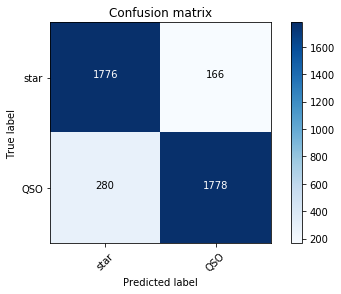

In [21]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred), ["star", "QSO"])

Text(0, 0.5, 'g-r')

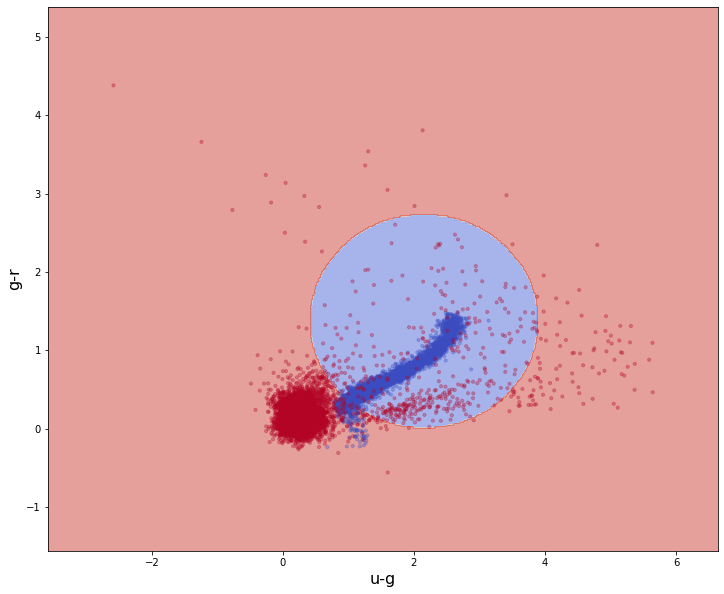

In [22]:
fig, ax = plt.subplots(figsize = (12, 10))
xx, yy = make_meshgrid(data["u-g"], data["g-r"])
plot_contours(ax, gnb, xx, yy, "QSO",
                  cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(data["u-g"], data["g-r"], c=(data.cat=='QSO'), cmap=plt.cm.coolwarm, s=10, edgecolors=None, alpha = 0.3)
ax.set_xlabel("u-g", fontsize=16)
ax.set_ylabel("g-r", fontsize=16)

## Gaussian Bayes Classifier

The next step is to relax the assumption of conditional independence. This can be done including covariances in the model distributions.

A multivariate Gaussian can be expressed as:

$\Large p_k({\bf x}) = \frac{1}{\bigl|\sum_k\bigr|^{1/2} (2 \pi)^{D/2}} \exp \bigg\lbrace -\frac{1}{2} ({\bf x} - \mu_k)^T \sum_k^{-1} ({\bf x} - \mu_k) \biggr\rbrace$

where $\sum_k$ is a $D x D$ symmetric covariance matrix with determinant $\bigl|\sum_k\bigr|$

Using this result, the Gaussian Bayes classifier estimator for $\hat{y}$ is:

$\Large \hat{y} = argmax_k \biggl\lbrace -\frac{1}{2} \log \bigl|\sum_k\bigr| - \frac{1}{2} ({\bf x} - \mu_k)^T \sum_k^{-1} ({\bf x} - \mu_k) + \log \pi_k \biggr\rbrace$

or (in the case of two classes)

$\Large \hat{y} =  \begin{cases} 1, & \text{if}\ m_1^2 < m_0^2 + 2 \log \biggl(\frac{\pi_1}{\pi_0}\biggr) + \biggl(\frac{|\sum_1|}{|\sum_0|}\biggr) \\
      0, & \text{otherwise} \end{cases}$
    

where $\Large m_k^2 = (x - \mu_k)^T \sum_k^{-1} (x - \mu_k)$ is the Mahalanobis distance

## Linear Discriminant Analysis (LDA)

In this case we assume that the distributions of $p_k(\vec{x})$ have the same covariance matrices.

The optimal classifier can be derived from the log of the class posteriors:

$\Large g_k({\bf x}) = {\bf x}^T \sum^{-1} \mu_k - \frac{1}{2} \mu_k^T \sum^{-1} \mu_k + \log \pi_k + const$

Note that we have used that $\large (x^T \sum^{-1} \mu_k) = (x^T \sum^{-1} \mu_k)^T = \mu_k^T (\sum^{-1})^T x = \mu_k^T (\sum^T)^{-1} x = \mu_k^T \sum^{-1} x$

The discriminant boundary between the classes is the line that minimizes the overlap between the Gaussians, i.e. it is linear in $\bf x$:

$\Large g_k({\bf x}) - g_l({\bf x}) = {\bf x}^T \sum^{-1} (\mu_k - \mu_l) - \frac{1}{2} \biggl(\mu_k^T \sum^{-1} \mu_k - \mu_l^T \sum^{-1} \mu_l\biggr) + \log \biggl( \frac{\pi_k}{\pi_l} \biggr) = 0$

In [23]:
# example
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
y_pred = lda.fit(X_train, y_train).predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f1-score:", metrics.f1_score(y_test, y_pred, pos_label="QSO"))

Accuracy: 0.8635
f1-score: 0.8641114982578396


Confusion matrix, without normalization


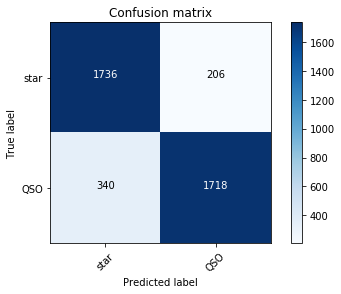

In [24]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred), ["star", "QSO"])

Text(0, 0.5, 'g-r')

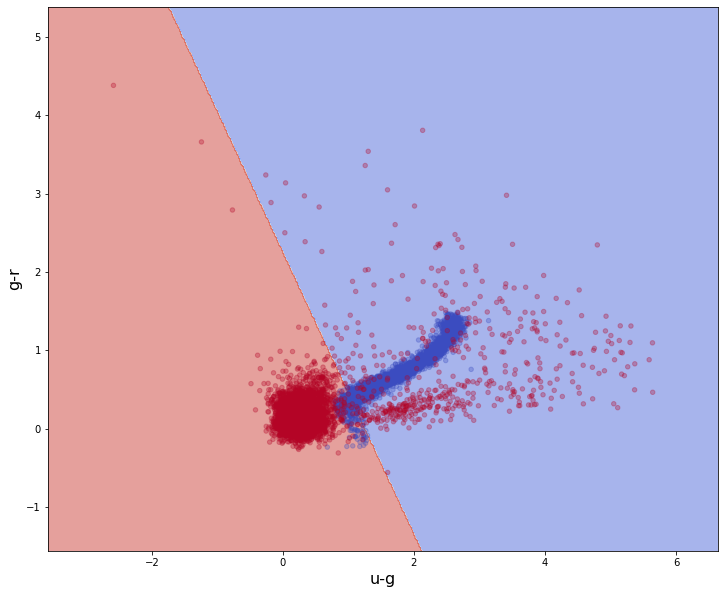

In [25]:
fig, ax = plt.subplots(figsize = (12, 10))
xx, yy = make_meshgrid(data["u-g"], data["g-r"])
plot_contours(ax, lda, xx, yy, "QSO",
                  cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(data["u-g"], data["g-r"], c=(data.cat=='QSO'), cmap=plt.cm.coolwarm, s=20, edgecolors=None, alpha = 0.3)
ax.set_xlabel("u-g", fontsize=16)
ax.set_ylabel("g-r", fontsize=16)

## Quadratic Discriminant Analysis (QDA)

If we don't assume that the covariances are the same between classes, the discriminant function between classes becomes quadratic in $\bf x$:

$\Large g({\bf x}) = -\frac{1}{2} \log |\sum_k| - \frac{1}{2} ({\bf x} - \mu_k)^T \sum_k^{-1} ({\bf x} - \mu_k) + \log \pi_k$


![](images/LDA_QDA.png)

In [26]:
# example
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
y_pred = qda.fit(X_train, y_train).predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f1-score:", metrics.f1_score(y_test, y_pred, pos_label="QSO"))

Accuracy: 0.9715
f1-score: 0.9705882352941176


Confusion matrix, without normalization


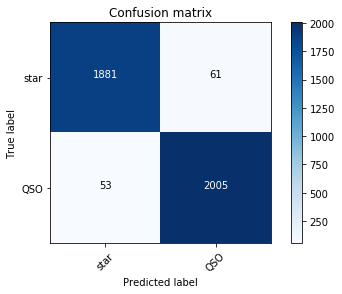

In [27]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred), ["star", "QSO"])

Text(0, 0.5, 'g-r')

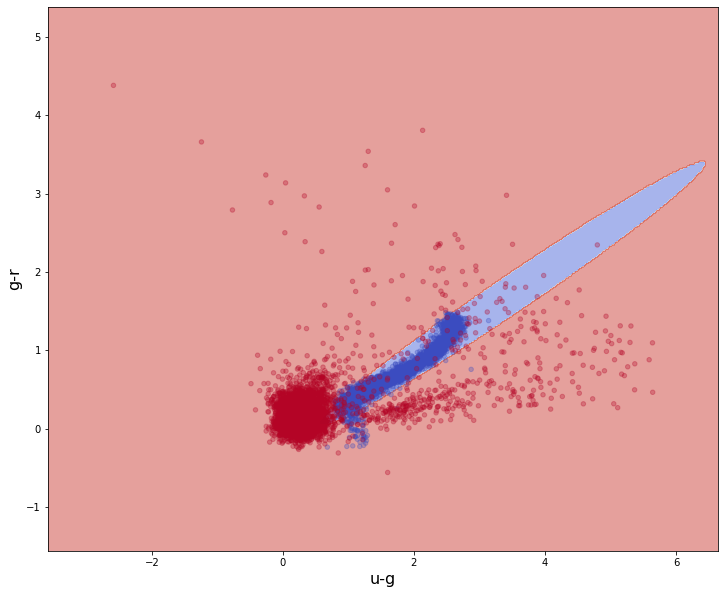

In [28]:
fig, ax = plt.subplots(figsize = (12, 10))
xx, yy = make_meshgrid(data["u-g"], data["g-r"])
plot_contours(ax, qda, xx, yy, "QSO",
                  cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(data["u-g"], data["g-r"], c=(data.cat=='QSO'), cmap=plt.cm.coolwarm, s=20, edgecolors=None, alpha = 0.3)
ax.set_xlabel("u-g", fontsize=16)
ax.set_ylabel("g-r", fontsize=16)

See http://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py

## Gaussian Mixture Model

We can further assume that the distribution of features in each classes can be modeled by a mixture of Gaussians, or even more generally by a multidimensional kernel density estimation for a non-parametric approach.

The first case is called **Gaussian Mixture Model classification** and the second case **Kernel discriminant analysis**.

The kernel discriminant analysis can be thought as the limit of the Gaussian Mixture Model where every point is represented by a Gaussian. In this case the optimization of the model is simply over the kernel bandwidth, so it is computationally more simple.

![](images/GMM_class.png)


See http://scikit-learn.org/0.16/auto_examples/mixture/plot_gmm_classifier.html

In [29]:
# example
from astroML.classification import GMMBayes
gmmb = GMMBayes(n_components=5)
y_pred = gmmb.fit(X_train, y_train).predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f1-score:", metrics.f1_score(y_test, y_pred, pos_label="QSO"))

Accuracy: 0.98875
f1-score: 0.9883147234484548


Confusion matrix, without normalization


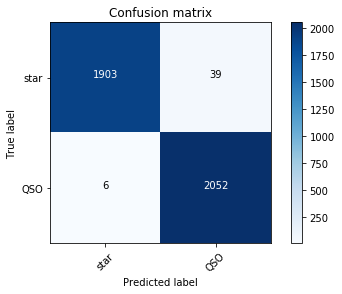

In [30]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred), ["star", "QSO"])

Text(0, 0.5, 'g-r')

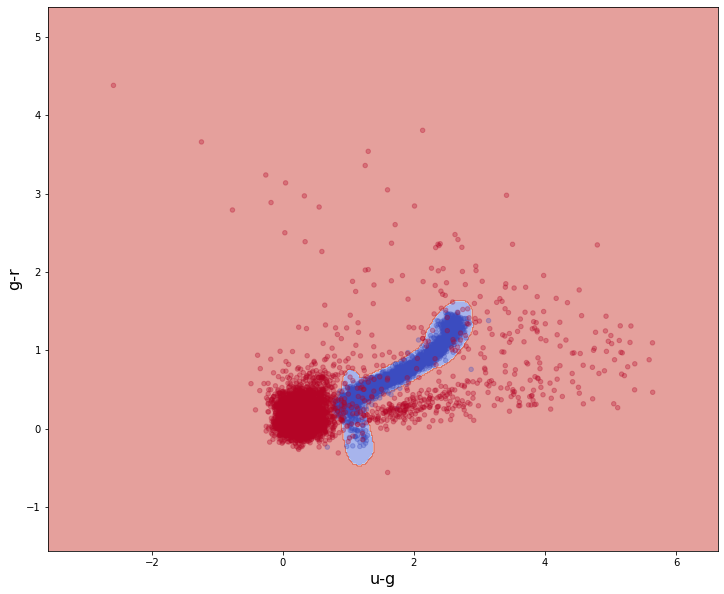

In [31]:
fig, ax = plt.subplots(figsize = (12, 10))
xx, yy = make_meshgrid(data["u-g"], data["g-r"])
plot_contours(ax, gmmb, xx, yy, "QSO",
                  cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(data["u-g"], data["g-r"], c=(data.cat=='QSO'), cmap=plt.cm.coolwarm, s=20, edgecolors=None, alpha = 0.3)
ax.set_xlabel("u-g", fontsize=16)
ax.set_ylabel("g-r", fontsize=16)

## K-nearest neighbor classifier

One of the most widely used and powerful classifiers: simply uses the label of the nearest point!

Intuitive justification is that  $\Large p(y|x) \approx p(y|x')$  if  $\Large x \approx x'$.

Method is completely **non-parametric**

Resulting decision boundary is a Voronoi tesselation of the attribute space.

The number of neighbors K is used as a smoothing parameter to regulate the complexity of the classification.

Weights can be assigned by weighting the votes by their distance.

![](images/Knearest.png)


**Problem**

A metric must be defined to compute a multidimensional distance.

When features have different dimensions this can be arbitrary. 

Some approaches:

- normalization of the features (scaling from 0 to 1)
- weighting the importance of features based on cross-validation
- use of Mahalanobis distance: $\Large D(x, x_0) = (x-x_0)^T C^{-1} (x-x_0)$

This method works well when the training sample is large, when this is not the case a parametric classification model can be used.

See http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

Let's find the optimal number of neighbors via stratified k-fold cross validation

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
n_splits = 4
acc = {}
f1s = {}
kf = StratifiedKFold(n_splits = n_splits)
nns = [1, 2, 4, 8, 16, 32, 64, 128]
for nn in nns:
    acc[nn] = []
    f1s[nn] = []
    for idx, traintest in enumerate(kf.split(data[["u-g", "g-r"]], data.cat)):
        train, test = traintest
        knn = KNeighborsClassifier(n_neighbors=nn)
        y_pred = knn.fit(X_train, y_train).predict(X_test)
        acc[nn].append(metrics.accuracy_score(y_test, y_pred))
        f1s[nn].append(metrics.f1_score(y_test, y_pred, pos_label="QSO"))
    acc[nn] = np.average(acc[nn])
    f1s[nn] = np.average(f1s[nn])
    print("Accuracy (%i):" % nn, metrics.accuracy_score(y_test, y_pred))
    print("f1-score (%i):" % nn, metrics.f1_score(y_test, y_pred, pos_label="QSO"))
acc = list(acc.values())
f1s = list(f1s.values())

Accuracy (1): 0.9795
f1-score (1): 0.978974358974359
Accuracy (2): 0.9735
f1-score (2): 0.9730279898218831
Accuracy (4): 0.98675
f1-score (4): 0.9863013698630138
Accuracy (8): 0.98875
f1-score (8): 0.9883147234484548
Accuracy (16): 0.986
f1-score (16): 0.9853862212943633
Accuracy (32): 0.984
f1-score (32): 0.9832548403976976
Accuracy (64): 0.97975
f1-score (64): 0.978712220762155
Accuracy (128): 0.9705
f1-score (128): 0.968683651804671


Text(0.5, 0, 'n neighbors')

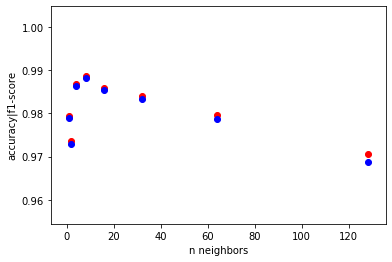

In [33]:
plt.scatter(nns, acc, c = 'r')
plt.scatter(nns, f1s, c = 'b')
plt.ylabel("accuracy|f1-score")
plt.xlabel("n neighbors")

Confusion matrix, without normalization


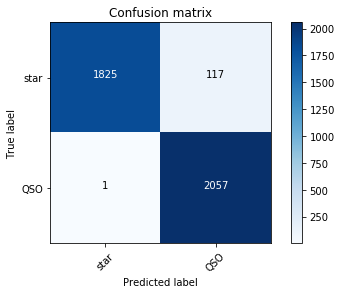

In [34]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred), ["star", "QSO"])

Text(0, 0.5, 'g-r')

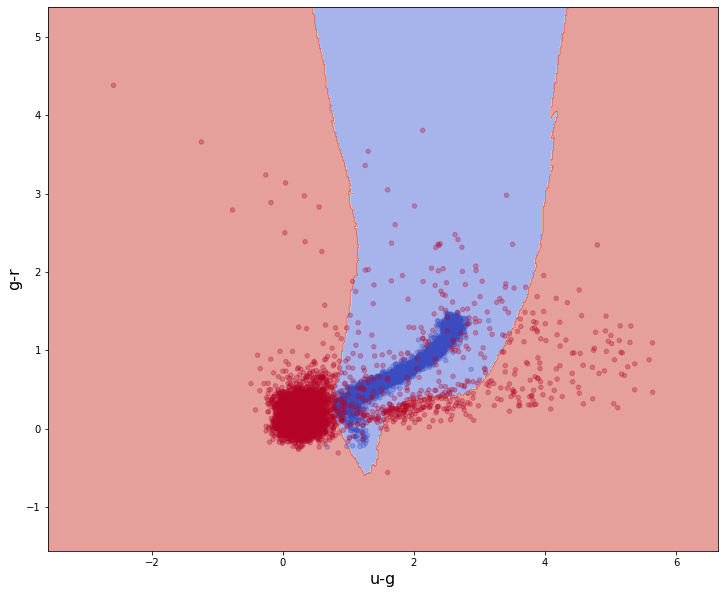

In [35]:
fig, ax = plt.subplots(figsize = (12, 10))
xx, yy = make_meshgrid(data["u-g"], data["g-r"])
plot_contours(ax, knn, xx, yy, "QSO",
                  cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(data["u-g"], data["g-r"], c=(data.cat=='QSO'), cmap=plt.cm.coolwarm, s=20, edgecolors=None, alpha = 0.3)
ax.set_xlabel("u-g", fontsize=16)
ax.set_ylabel("g-r", fontsize=16)

# Discriminative classification

Direct modelling of the decision boundary: $\large g(x) = p(y = 1|x)$. The boundary would be defined by

\begin{equation}
\Large
\hat y = \begin{cases} 1  \ \ \ {\rm if}\  g(x) > 0.5 \\ 0 \ \ \ {\rm otherwise} \end{cases}
\end{equation}

## Logistic regression

An example of discriminative analysis where the discriminant function is modelled as:

$\Large p(y = 1|x) = \frac{\exp \biggl[ \sum_j \theta_j x^j \biggr]}{1 + \exp \biggl[ \sum_j \theta_j x^j \biggr]} = p({\bf \theta})$

Text(0, 0.5, '$p(y=1|x)$')

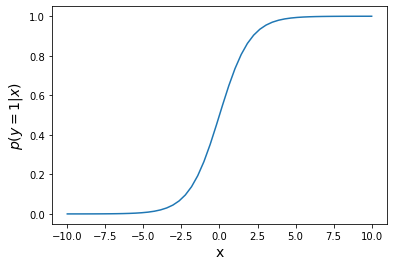

In [42]:
xt = np.linspace(-10, 10)
plt.plot(xt, np.exp(xt) / (1 + np.exp(xt)))
plt.xlabel("x", fontsize=14)
plt.ylabel(r"$p(y=1|x)$", fontsize=14)

It can be shown that this assumptions makes the log likelihood ratio linear in the parameters:

$\Large \log \biggl( \frac{p(y = 1 | x)}{p(y = 0 | x)} \biggr) = \beta_0 + \beta_1 x$

![](images/logistic.png)

See http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py

In [43]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
y_pred = lrc.fit(X_train, y_train).predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f1-score:", metrics.f1_score(y_test, y_pred, pos_label="QSO"))

Accuracy: 0.90025
f1-score: 0.8964443290942122


/home/fforster/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix, without normalization


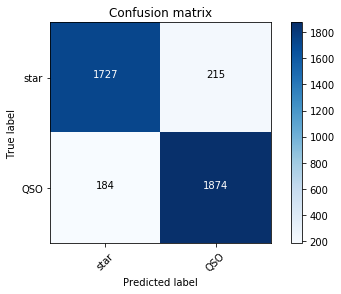

In [44]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred), ["star", "QSO"])

Text(0, 0.5, 'g-r')

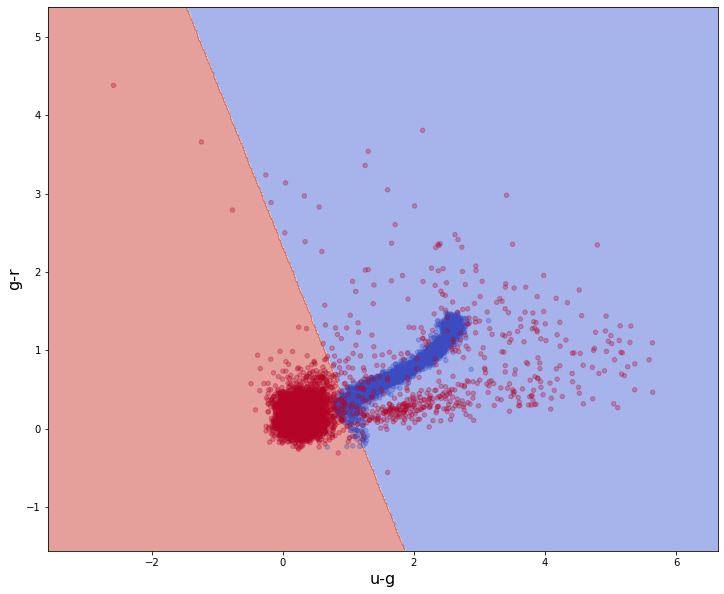

In [45]:
fig, ax = plt.subplots(figsize = (12, 10))
xx, yy = make_meshgrid(data["u-g"], data["g-r"])
plot_contours(ax, lrc, xx, yy, "QSO",
                  cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(data["u-g"], data["g-r"], c=(data.cat=='QSO'), cmap=plt.cm.coolwarm, s=20, edgecolors=None, alpha = 0.3)
ax.set_xlabel("u-g", fontsize=16)
ax.set_ylabel("g-r", fontsize=16)

## Support vector machine

Consider the hyperplane that maximizes the margin $m$ between points:

![](images/SVM_Ivezic.png)


### Strict linear separation

* An hyperplane can be defined as ${\bf w} \cdot {\bf x} - b = 0$, the distance from the origin to the hyperplane is $\frac{b}{|| w ||}$

* The equation ${\bf w} \cdot {\bf x} - b = 1$ defines an hyperplane separated by $\frac{1}{||w||}$ from the previous plane

![](images/SVM_margin.png)


* if we have two classes, we can assign $y_i = \pm 1$ to the points of each class.

* Then, we want to find the parameters ${\bf w}$ and $b$ such that:

    $\Large y_i ({\bf w} \cdot {\bf x_i} - b) \ge 1, ~~~~\forall i$

If we want to find the hyperplane defined by ${\bf w}$ and $b$ that has the largest separation between classes, i.e. we want to solve for:

$\Large \min_{{\bf w}, b}~ ||{\bf w} ||,~~~ s.t. ~~~ \Large y_i ({\bf w} \cdot {\bf x_i} - b) \ge 1, ~~~~\forall i$

The solution to this problem can be done via quadratic programming. 

### Soft margin separation

* If we allow for some points to cross the boundary we can instead minimize:

$\Large \min_{{\bf w}, b} ~\lbrace \frac{1}{n} \sum_{i=1}^n \max (0, 1 - y_i ({\bf w} \cdot {\bf x} - b)) \rbrace + \lambda ||{\bf w}||^2$

![](images/SVM_Ivezic2.png)


### Non linear extension

* SVM can be extended to non linear separations applying the **kernel trick**.

* This consists of replacing all the dot products by a function $k({\bf x_i}, {\bf x_j})$

* The kernel is related to the transform $\varphi({\bf x})$ by the equation $k({\bf x_i}, {\bf x_j}) = \varphi({\bf x_i}) \cdot \varphi({\bf x_j})$

* ${\bf w}$ can be written in the transformed space: ${\bf w} = \sum_i \alpha_i y_i \varphi({\bf x_i})$

* Dot product with $\bf w$ can be written as ${\bf w} \cdot \varphi({\bf x}) = \sum_i \alpha_i y_i k({\bf x_i}, {\bf x})$

![](images/Kernel_Machine.png)


A common kernel is the following:

$\Large K(x_i, x_i') = \exp(-\gamma || x_i - x_i'||^2)$

where $\gamma$ is learnt through cross--validation. 

![](images/SVM_kernel.png)


In [46]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')#, kernel = "linear")
y_pred = svc_model.fit(X_train, y_train).predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f1-score:", metrics.f1_score(y_test, y_pred, pos_label="QSO"))

Accuracy: 0.9795
f1-score: 0.9785115303983228


Confusion matrix, without normalization


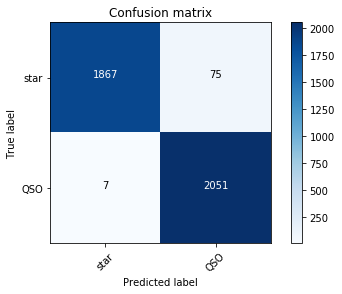

In [47]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred), ["star", "QSO"])

Text(0, 0.5, 'g-r')

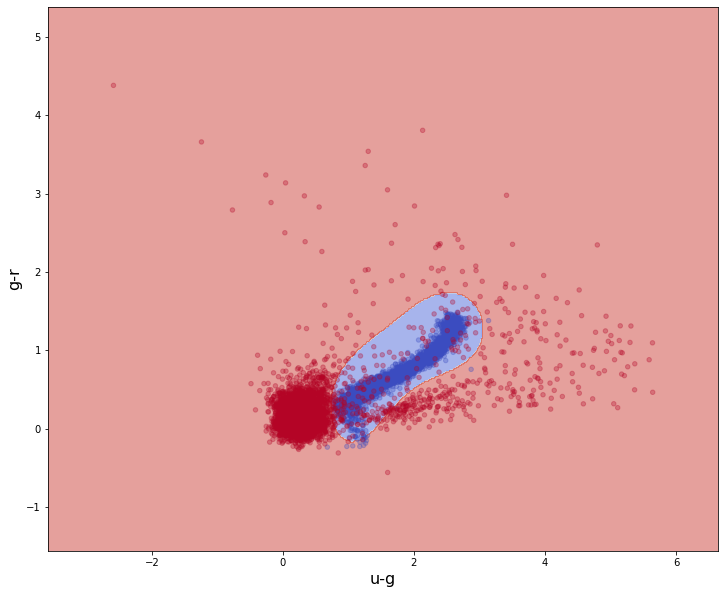

In [48]:
fig, ax = plt.subplots(figsize = (12, 10))
xx, yy = make_meshgrid(data["u-g"], data["g-r"])
plot_contours(ax, svc_model, xx, yy, "QSO",
                  cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(data["u-g"], data["g-r"], c=(data.cat=='QSO'), cmap=plt.cm.coolwarm, s=20, edgecolors=None, alpha = 0.3)
ax.set_xlabel("u-g", fontsize=16)
ax.set_ylabel("g-r", fontsize=16)

# Decision trees

An extension of classification methods based on modelling the boundary between classes are the **decision trees**, which model the decision boundary in a hierarchical fashion

![](images/sorted.jpg)

**What is the decision boundary for the following design matrix?**

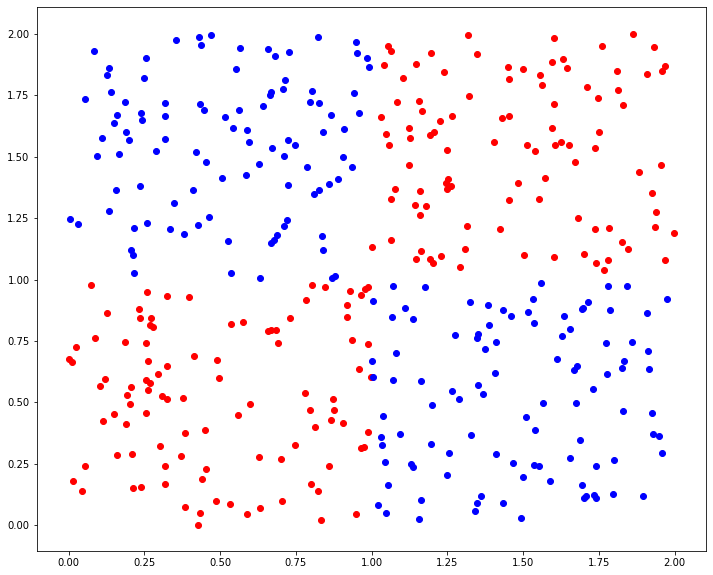

In [42]:
fig, ax = plt.subplots(figsize = (12, 10))
ax.scatter(np.random.random(100), np.random.random(100), c = 'r')
ax.scatter(1 + np.random.random(100), 1 + np.random.random(100), c = 'r')
ax.scatter(np.random.random(100), 1 + np.random.random(100), c = 'b')
ax.scatter(1 + np.random.random(100), np.random.random(100), c = 'b')

**This type of decision trees can also be applied for the classification of astronomical sources**

- At each branch data is subdivided into child nodes, based on a decision boundary.

- Boundaries are usually axis aligned (data is split along one feature at each level of the tree)

- the splitting occurs until some stopping criteria

- terminal nodes record the fraction of points contained within that node from each class

![](images/tree.png)

At each node the fraction of points within the node in each class is annotated

![](images/tree_2.png)

## Tree splitting

The difficulty in building a tree is which feature to choose and the value for splitting in each node. 

A simple splitting criterion is based on entropy:


$\Large E(x) = -\sum\limits_i p_i(x) \ln(p_i(x))$


where $i$ is the class and $p_i(x)$ is the probability of that class given the training data.

In the example above the entropy at the first node is ![](images/split_0.png)

In [94]:
def E(n1, n2):
    p1 = n1 / (n1 + n2)
    p2 = n2 / (n1 + n2)
    return -(p1 * np.log(p1) + p2 * np.log(p2))
print(E(69509, 346))
print(E(49509, 20346))

0.031230679249027685
0.6032764307951708


We can define **information gain** as the reduction of entropy due to the partitioning of the data (the difference between the entropy of the parent node and the sum of the entropies of the child nodes).


For a binary split with $i=0$ representing points below the threshold and $i=1$ above the split threshold, the information gain $IG$ is:

$\Large IG(x|x_i) = E(x) - \sum\limits_{i=0}^{1} \frac{N_i}{N} E(x_i)$


where $N_i$ is the number of points, $x_i$, in class  $i$, and $E(x)$ is the entropy associated with that class.

In the example above the information gain after the first split is: ![](images/split.png)



In [95]:
n1 = 69509
n2 = 346
n1_1 = 66668
n2_1 = 13
n1_2 = 2841
n2_2 = 333
IG = E(n1, n2) \
    - (n1_1 + n2_1) / (n1 + n2) * E(n1_1, n2_1) \
    - (n1_2 + n2_2) / (n1 + n2) * E(n1_2, n2_2)
print(IG)

0.01419933827960912


Finding the optimal splits is considered computationally intractable. 

The search for the split is done in a *greedy* fashion, i.e. each feature is considered one at a time and the feature that provides the largest information gain is split.

The value of the feature at which to split the data is analogously defined, sorting the data on feature $i$ and maximizing the information gain for a given split point, $s$:


$\begin{align}
& \Large IG(x|s) =
& \Large \arg\max\limits_s \biggl(E(x) -  \frac{N(x~|~x ~<~ s)}{N} E(x~|~x ~<~ s) - \frac{N(x~|~x ~\ge~ s)}{N} E(x~|~x ~\ge~ s) \biggr)
\end{align}$

### Other classification criteria

Other classification criteria are the Gini coefficient and the misclassification error

The **Gini coefficient (G)** is the probability that a source would be incorrectly classified if it was chosen at random and the label was selected randomly based on the distribution of classifications
within the data set, for $k$ classes is given by:

$\Large G = \sum\limits_i^k p_i (1 - p_i)$

The **misclassification error (MC)** is the fractional probability that a point selected at random will be missclassified:

$\Large MC = 1 - \max_i(p_i)$

### Stopping criteria

To build the tree nodes are split until some stopping criteria is met. Common stopping criteria are:

- a node contains only one class of objects
- the split does not provide positive information gain or a reduction in the misclassification error
- the number of objects per node reaches a predefined value 

## Building the tree

The complexity of a tree is defined by the number of levels of depth of the tree. As the depth increases, the error on the training set will decrease, but at some point we will **overfit** the data. 

The avoid overfitting we can use **cross-validation**.

The first approach is to determine the depth (complexity) of the tree by cross-validation

![](images/trees_crossvalidation.png)

A second approach is to **prune** the tree using cross-validation. 

For each node we consider whether terminating the tree at that node improves the accuracy in the validation set. 

If so, we prune the branches below that node

![](images/tree_pruned.png)

## Bagging, Random forests and boosting

A different approach for classification is that of *ensemble learning*: combining the output of several models through some kind of voting or averaging.

### Bagging

In **bagging** we take averages over the prediction of a series of **bootstrap** samples from the training set. Bagging is short for bootstrap + aggregating.


For a sample of N points in a training set, bagging generates $K$ equally sized bootstrap samples from which to estimate a function $f_i(x)$. The final estimator is then:

$\Large f(x) = \frac{1}{K} \sum\limits_i^K f_i(x)$

### Random forests

In **random forests** this concept is expanded even further by generating a set of decision trees from the bootstrap samples with a random set of features.

Random forests contain $n$ trees and $m$ randomly selected features used per tree. Keeping $m$ small compared to the number of features controls the complexity of the model and reduces over-fitting.

Random forests and its derivatives are usually the best classifiers available for feature based classification.

![](images/RF.jpg)

- In random forests, the number of trees, the depth of the trees, and the number of features per tree, $m$, can be chosen via cross-validation.

- $m$ is usually chosen to be $\sim \sqrt{K}$, where $K$ is the number of features.

#### Out-of-bag metrics

In random forests we can also report **out-of-bag (oob)** metrics, which are the metrics computed over points which were not used in the bootstrap sample used to train a specific tree.

#### Feature importance

One advantage of decision trees and random forests is that we can compute the change in entropy, gini index change or misclassification error summed over specific features of the tree, then average over all trees in the case of random forests.

This means that we can estimate the **feature importance** over all features.

Some important options in sklearn:

- `n_estimators`: the number of trees (default=10)

- `criterion`: the function used to split the tree (default='gini', better use 'entropy')

- `max_depth`: maximum depth of the tree

- `n_jobs`: number of parallel cores to use during computation

- `oob_score`: whether to use out-of-bag samples to estimates the generalization accuracy

- `class_weight`: weights associated with classes in the form `{class_label: weight}` (default=None). If not given, all classes are assumed to have weight one. Can give dictionary of weights, or 'balanced' for inverse class frequency weighting, or 'balanced_subsample' for inverse class frequency weighting inside each bootstrap sample.

When the tree has been trained, we can extract:

- `feature_importances_`: the importance of each feature

- `oob_score`: the chosen metric over out-of-bag estimates

**Some considerations**

- when the number of features is large and the number of relevant features is small, the random forest may perform poorly (the chances of selecting a relevant feature in each split will be low)

- increasing the number of trees generally does not lead to over-fitting

Let's try it with our dataset

In [105]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy', n_estimators=1000, oob_score=True, n_jobs=8)#, class_weight='balanced')
y_pred = rfc.fit(X_train, y_train).predict(X_test)
print("Out-of-bag score:", rfc.oob_score_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f1-score:", metrics.f1_score(y_test, y_pred, pos_label="QSO"))
print("Feature importance:", dict(zip(list(X_train), rfc.feature_importances_)))

Out-of-bag score: 0.9851666666666666
Accuracy: 0.98725
f1-score: 0.9868046571798188
Feature importance: {'u-g': 0.6902105556992715, 'g-r': 0.3097894443007286}


Normalized confusion matrix


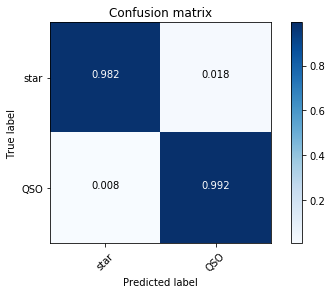

In [106]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred), ["star", "QSO"], normalize=True)

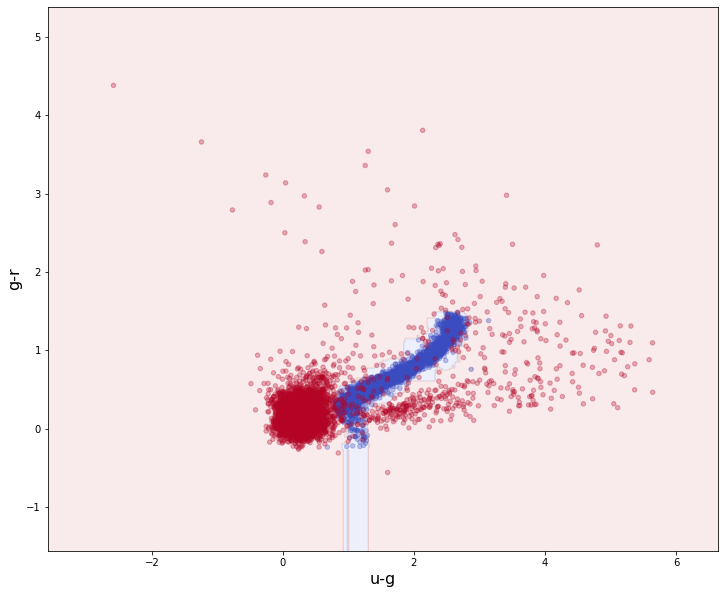

In [98]:
fig, ax = plt.subplots(figsize = (12, 10))
xx, yy = make_meshgrid(data["u-g"], data["g-r"])
plot_contours(ax, rfc, xx, yy, "QSO",
                  cmap=plt.cm.coolwarm, alpha=0.1)
ax.scatter(data["u-g"], data["g-r"], c=(data.cat=='QSO'), cmap=plt.cm.coolwarm, s=20, edgecolors=None, alpha = 0.3)
ax.set_xlabel("u-g", fontsize=16)
ax.set_ylabel("g-r", fontsize=16)
#ax.set_xlim(-2, 6)
#ax.set_ylim(-2, 6)
plt.savefig("boundary_non_weighted.png")

### Boosting

In **boosting** the samples are weighted by the misclassification error, emphasizing the most difficult cases.

It is motivated by the idea that combining many weak classifiers can result in improved classification

Rather than creating models separately on different data sets, boosting creates each model to attempt to correct the errors of the ensemble

The central idea is to reweight the data based on how incorrectly the data were classified in the previous iteration.

Imagine that we had a weak classifier, $h(x)$, that we wish to apply to a data set and we want to create a strong classifier, $f(x)$, such that:

$\Large f(x) = \sum\limits_m^K \theta_m h_m(x)$

If we start with a set of data, $X$, with known classifications, $y$, we can assign a weight, $w_m(x)$ to each point.

After the application of the weak classifier, $h_m(x)$, we can estimate the classification error, $e_m$, as:

$\Large e_m = \sum\limits_{i=1}^N w_m(x_i) I(h_m(x_i) \ne y_i)$

where $I(h_m(x_i) \ne y_i)$ is 1 for $h_m(x_i) \ne y_i$ and 0 otherwise.

From this we define the weight $\theta_m$:

$\Large \theta_m = \frac{1}{2} \log \biggl(\frac{1 - e_m}{e_m} \biggr)$

and update the weights for each point:

$\Large w_{m+1}(x_i) = w_m(x_i) ~\times ~ \biggr\lbrace\begin{array}{lr}
\exp(-\theta_m) & h_m(x_i) = y_i \\
\exp(\theta_m) & h_m(x_i) \ne y_i
\end{array}$

This algorithm is known as **AdaBoost**, see https://en.wikipedia.org/wiki/AdaBoost

A problem with boosted decision trees is that since they run serially they cannot be easily parallelized.

In [99]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
y_pred = abc.fit(X_train, y_train).predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f1-score:", metrics.f1_score(y_test, y_pred, pos_label="QSO"))
print("Feature importance:", dict(zip(list(X_train), abc.feature_importances_)))

Accuracy: 0.97025
f1-score: 0.9687417914368269
Feature importance: {'u-g': 0.5, 'g-r': 0.5}


Normalized confusion matrix


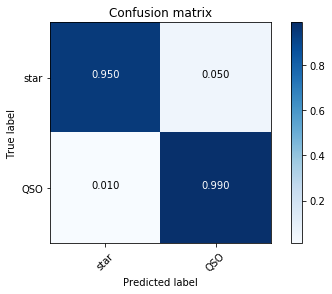

In [100]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred), ["star", "QSO"], normalize=True)

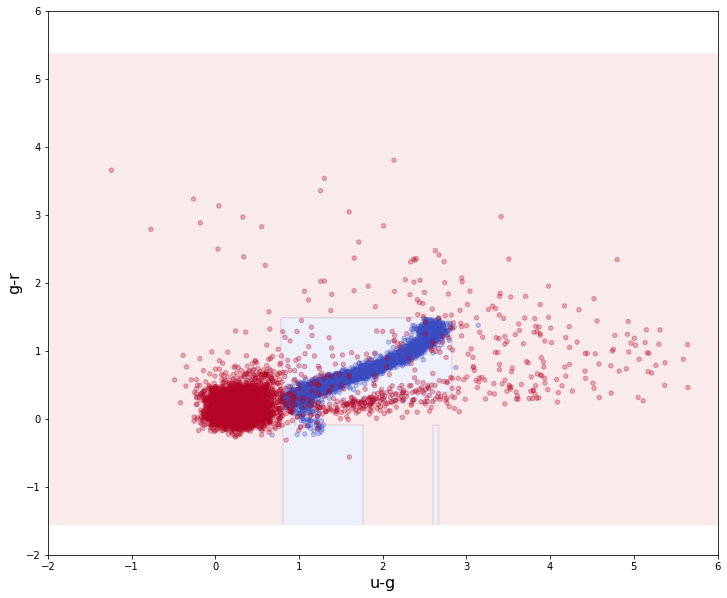

In [101]:
fig, ax = plt.subplots(figsize = (12, 10))
xx, yy = make_meshgrid(data["u-g"], data["g-r"])
plot_contours(ax, abc, xx, yy, "QSO",
                  cmap=plt.cm.coolwarm, alpha=0.1)
ax.scatter(data["u-g"], data["g-r"], c=(data.cat=='QSO'), cmap=plt.cm.coolwarm, s=20, edgecolors=None, alpha = 0.3)
ax.set_xlabel("u-g", fontsize=16)
ax.set_ylabel("g-r", fontsize=16)
ax.set_xlim(-2, 6)
ax.set_ylim(-2, 6)
plt.savefig("boundary_non_weighted.png")

### Gradient Boosting

This is a variation from AdaBoost. 

In this type of classifier we try to approximate a steepest descent criterion after each evaluation.

The basic idea is to assume that the $m+1$ classifier gives the correct classifications after applying a correction $h$ to the $m$ classifier:

$\Large F_{m+1}(x) = F_m(x) + h(x) = y$

where $F_m(x)$ is the $m$-th classifier

This implies that residual $h(x)$:

$\Large h(x) = y - F_m(x)$

The name follows from the observation that the residuals $h_m(x)$ for a given model are the negative gradients of the mean squared error loss functions w.r.t. F(x):

$\Large L_{MSE} = \frac{1}{2} (y - F_m(x))^2$

$\Large h_m(x) = \frac{- \partial L_{MSE}}{\partial F} = y - F(x)$

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
y_pred = gbc.fit(X_train, y_train).predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f1-score:", metrics.f1_score(y_test, y_pred, pos_label="QSO"))
print("Feature importance:", dict(zip(list(X_train), abc.feature_importances_)))

Accuracy: 0.98775
f1-score: 0.987256176853056
Feature importance: {'u-g': 0.5, 'g-r': 0.5}


Normalized confusion matrix


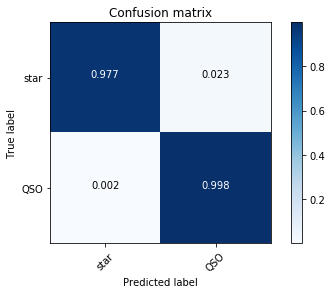

In [108]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred), ["star", "QSO"], normalize=True)

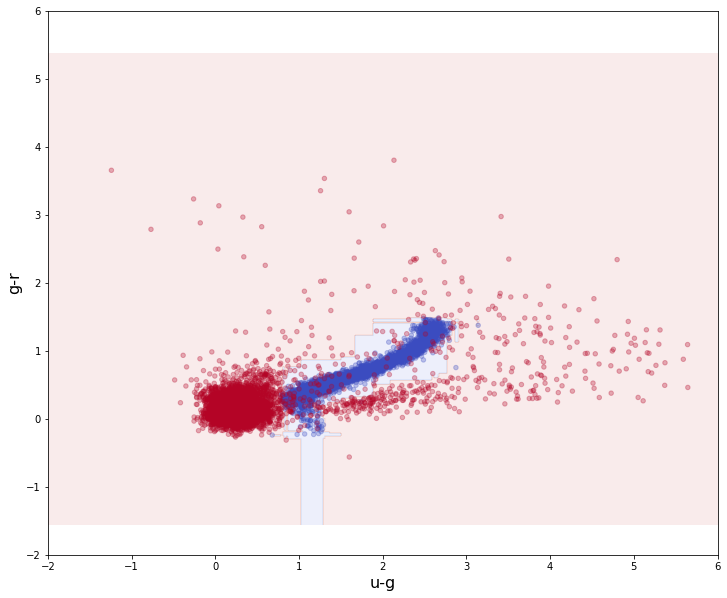

In [109]:
fig, ax = plt.subplots(figsize = (12, 10))
xx, yy = make_meshgrid(data["u-g"], data["g-r"])
plot_contours(ax, gbc, xx, yy, "QSO",
                  cmap=plt.cm.coolwarm, alpha=0.1)
ax.scatter(data["u-g"], data["g-r"], c=(data.cat=='QSO'), cmap=plt.cm.coolwarm, s=20, edgecolors=None, alpha = 0.3)
ax.set_xlabel("u-g", fontsize=16)
ax.set_ylabel("g-r", fontsize=16)
ax.set_xlim(-2, 6)
ax.set_ylim(-2, 6)
plt.savefig("boundary_non_weighted.png")

### Grid search

sklearn provides some useful tools for choosing parameters via cross-validation in `GridSearchCV`

In [110]:
from sklearn.model_selection import GridSearchCV

In [115]:
parameters = {'criterion': ('gini', 'entropy'), 
              'n_estimators': (5, 10, 20, 100),
              'max_depth': (20, 40)}
rfc = RandomForestClassifier(n_jobs=1, class_weight='balanced')
clf = GridSearchCV(rfc, parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                

In [116]:
clf.get_params()

{'cv': 5,
 'error_score': 'raise-deprecating',
 'estimator__bootstrap': True,
 'estimator__class_weight': 'balanced',
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 'warn',
 'estimator__n_jobs': 1,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(bootstrap=True, class_weight='balanced',
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction

In [117]:
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 40, 'n_estimators': 100}


In [118]:
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f1-score:", metrics.f1_score(y_test, y_pred, pos_label="QSO"))

Accuracy: 0.98725
f1-score: 0.986811481768813


## Extreme Gradient Boosting (xgboost)

One of the most popular and successful supervised classification algorithms.

https://xgboost.ai/

Focus on speed and model performance. 

![](images/xgboost.jpeg)

xgboost has been used by several teams wining Kaggle challenges.

One of its focus is speed:

- parallel tree computation
- tree pruning on the fly
- hardware optimization

![](images/xgboost.png)

In terms of the algorithm, the following changes have been made:

- regularization via LASSO and Ridge regularization
- it accepts sparse data with missing values, by learning best missing values
- it uses **quantile sketch algorithm** to find optimal split points
- built-in cross-validation at each iteration

![](images/xgboost_performance.jpeg)

## Light Gradient Boosting Microsoft (lightGBM)

* Fast, distributed, high-preformance gradient boosting, developed by Microsoft

* LightGBM grows trees horizontally (leaf-wise) while other algorithms grow level-wise

![](images/lightgbm_comp.png)

### Transform labels to numbers with LabelEncoder

In [71]:
from sklearn.preprocessing import LabelEncoder

In [119]:
y_train.head()

135048.80+392008.1     QSO
3159                  star
1489                  star
2987                  star
812                   star
Name: cat, dtype: category
Categories (2, object): [QSO, star]

In [121]:
le = LabelEncoder()
le.fit(y_train)
print(le.classes_)
print(le.inverse_transform([0, 1]))
yt_train = le.transform(y_train)
yt_test = le.transform(y_test)

['QSO' 'star']
['QSO' 'star']


In [122]:
yt_train

array([0, 1, 1, ..., 0, 1, 0])

## XGBoost

In [123]:
def plot_contours_xgb(ax, xg, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = xg.predict(xgb.DMatrix(pd.DataFrame(data = np.c_[xx.ravel(), yy.ravel()], columns=["u-g", "g-r"]))) >= 0.5
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [124]:
import xgboost as xgb 

In [125]:
dtrain = xgb.DMatrix(X_train,label=yt_train)
dtest = xgb.DMatrix(X_test)

In [126]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [127]:
num_round = 50 
xg = xgb.train(parameters,dtrain,num_round) 

In [128]:
xg.predict(dtest)

array([0.04075164, 0.9467968 , 0.933916  , ..., 0.9467968 , 0.04075164,
       0.933916  ], dtype=float32)

In [129]:
y_pred = np.array(xg.predict(dtest) >= 0.5, dtype=int)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

Normalized confusion matrix


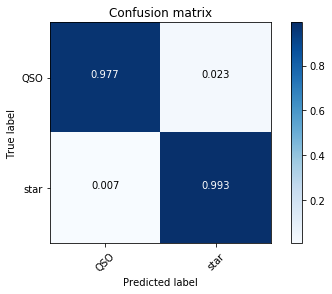

In [130]:
plot_confusion_matrix(metrics.confusion_matrix(np.array(yt_test), y_pred, le.transform(["QSO", "star"])), ["QSO", "star"], normalize=True)

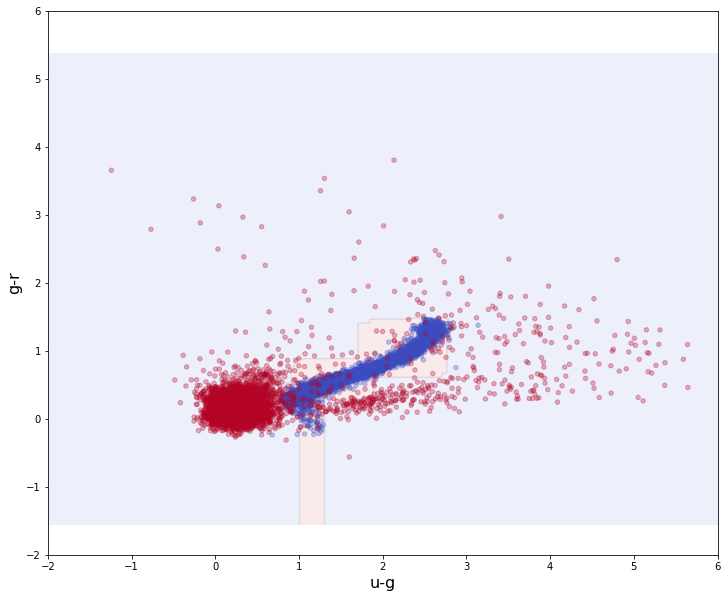

In [131]:
fig, ax = plt.subplots(figsize = (12, 10))
xx, yy = make_meshgrid(data["u-g"], data["g-r"])
plot_contours_xgb(ax, xg, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.1)
ax.scatter(data["u-g"], data["g-r"], c=(data.cat=='QSO'), cmap=plt.cm.coolwarm, s=20, edgecolors=None, alpha = 0.3)
ax.set_xlabel("u-g", fontsize=16)
ax.set_ylabel("g-r", fontsize=16)
ax.set_xlim(-2, 6)
ax.set_ylim(-2, 6)
plt.savefig("boundary_non_weighted.png")

## LightGBM

In [132]:
def plot_contours_lgm(ax, bst, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = bst.predict(np.c_[xx.ravel(), yy.ravel()]) >= 0.5
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [133]:
import lightgbm as lgb

In [134]:
train_data = lgb.Dataset(X_train, label=yt_train)

In [135]:
param = param = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200, 'is_unbalanced':True}
param['metric'] = 'auc'

In [136]:
num_round = 10
bst = lgb.train(param, train_data, num_round)

In [137]:
lgb.cv(param, train_data, num_round, nfold=5)

{'auc-mean': [0.9862494854174212,
  0.9872071997913723,
  0.9877329648417185,
  0.987769381381096,
  0.9879495027332457,
  0.9882710185118195,
  0.9891253073634501,
  0.98931009878615,
  0.9893414979615685,
  0.9895634287882192],
 'auc-stdv': [0.004629014210957812,
  0.005720117700771117,
  0.0048470320071055,
  0.004922592589102659,
  0.005008986391683315,
  0.004505000311193929,
  0.0036490620983779995,
  0.003456681797924675,
  0.0034238276899822284,
  0.0038007028803704592]}

In [138]:
y_pred = np.array(bst.predict(X_test) >= 0.5, dtype=int)

Normalized confusion matrix


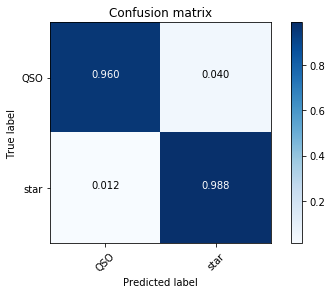

In [139]:
plot_confusion_matrix(metrics.confusion_matrix(np.array(yt_test), y_pred, le.transform(["QSO", "star"])), ["QSO", "star"], normalize=True)

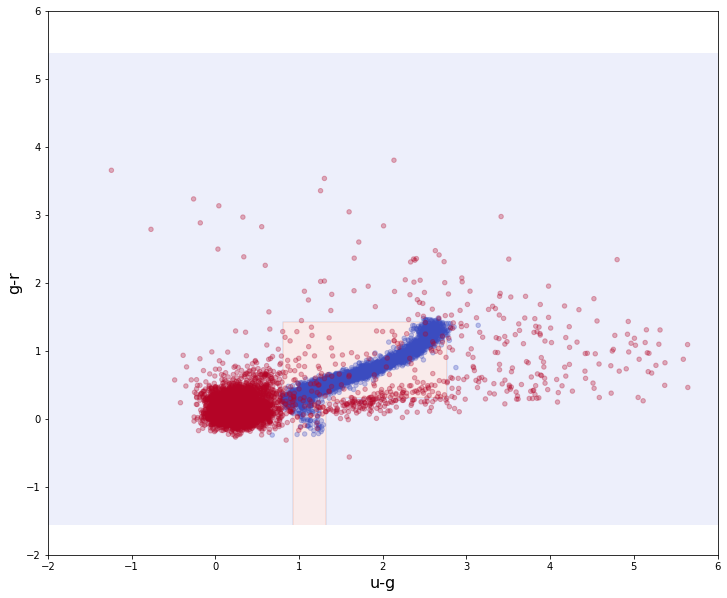

In [140]:
fig, ax = plt.subplots(figsize = (12, 10))
xx, yy = make_meshgrid(data["u-g"], data["g-r"])
plot_contours_lgm(ax, bst, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.1)
ax.scatter(data["u-g"], data["g-r"], c=(data.cat=='QSO'), cmap=plt.cm.coolwarm, s=20, edgecolors=None, alpha = 0.3)
ax.set_xlabel("u-g", fontsize=16)
ax.set_ylabel("g-r", fontsize=16)
ax.set_xlim(-2, 6)
ax.set_ylim(-2, 6)
plt.savefig("boundary_non_weighted.png")

# Comparison of methods

![](images/summary_Ivezic1.png)

![](images/summary_Ivezic2.png)

![](images/summary_table.png)

# Imbalanced data sets

![](images/imbdata.png)

## Reload data set

In [178]:
sel_cols = ["u-g", "g-r", "r-i", "i-z", "cat"]
data = pd.concat([stars[sel_cols], QSOs[sel_cols]])
data["cat"] = data["cat"].astype("category")
data.sample(10)

u-g    g-r    r-i    i-z  cat
030033.92+004324.7  0.335  0.188  0.134  0.201  QSO
142103.25+520427.0  0.108  0.136  0.095  0.164  QSO
081304.01+054314.4  0.228  0.168  0.197  0.289  QSO
101526.89+035017.4  0.666  0.400  0.478  0.281  QSO
141953.47+465423.4  0.154  0.164 -0.059 -0.034  QSO
093439.97+090755.7  0.373  0.016 -0.056  0.168  QSO
090956.45+441527.8  0.233  0.122  0.169 -0.087  QSO
141521.04+035354.5  2.393  0.367  0.086  0.127  QSO
081338.34+240729.1  0.307  0.146  0.265 -0.024  QSO
165012.08+241949.7  0.406  0.257  0.274  0.114  QSO

In [179]:
data.describe()

u-g           g-r           r-i           i-z
count  82429.000000  82429.000000  82429.000000  82429.000000
mean       0.535715      0.249260      0.152625      0.090630
std        0.821877      0.350443      0.178424      0.179029
min      -19.651000    -20.020000     -1.523000     -2.247000
25%        0.133000      0.059000      0.036000     -0.018000
50%        0.266000      0.176000      0.144983      0.071000
75%        0.502000      0.324000      0.245000      0.179000
max        7.178000      5.548000      3.228000     19.666000

In [180]:
data.groupby("cat").count()

u-g    g-r    r-i    i-z
cat                             
QSO   77429  77429  77429  77429
star   5000   5000   5000   5000

In [181]:
X_train, X_test, y_train, y_test = train_test_split(data[["u-g", "g-r"]], data.cat, test_size=.4)

In [182]:
np.unique(y_train, return_counts=True)

(array(['QSO', 'star'], dtype=object), array([46412,  3045]))

In [183]:
points = hv.Points(data, kdims=['u-g', 'g-r'], vdims=['cat'])
datashade.x_range=(data["u-g"].quantile(0.001),data["u-g"].quantile(0.995))
datashade.y_range=(data["g-r"].quantile(0.001),data["g-r"].quantile(0.995)); 
dynspread.max_px=100
dynspread.threshold=0.8
dynspread(datashade(points, aggregator=ds.count_cat('cat'))).opts(width=800, height=500)

/home/fforster/anaconda3/lib/python3.6/site-packages/datashader/utils.py:348: FutureWarning: `Series.cat.categorical` has been deprecated. Use the attributes on 'Series.cat' directly instead.
  ordered=col.cat.categorical.ordered)


:DynamicMap   []
   :RGB   [u-g,g-r]   (R,G,B,A)

In [184]:
points = hv.Points(data, kdims=['r-i', 'i-z'], vdims=['cat'])
datashade.x_range=(data["r-i"].quantile(0.001),data["r-i"].quantile(0.995))
datashade.y_range=(data["i-z"].quantile(0.001),data["i-z"].quantile(0.995)); 
dynspread.max_px=100
dynspread.threshold=0.8
dynspread(datashade(points, aggregator=ds.count_cat('cat'))).opts(width=800, height=500)

/home/fforster/anaconda3/lib/python3.6/site-packages/datashader/utils.py:348: FutureWarning: `Series.cat.categorical` has been deprecated. Use the attributes on 'Series.cat' directly instead.
  ordered=col.cat.categorical.ordered)


:DynamicMap   []
   :RGB   [r-i,i-z]   (R,G,B,A)

## SMOTE: Synthetic Minority Over-sampling Technique

https://jair.org/index.php/jair/article/view/10302/24590

**Abstract**

An approach to the construction of classifiers from imbalanced datasets is described.A dataset is imbalanced if the classification categories are not approximately equally represented.  Often real-world data sets are predominately composed of “normal” examples with only a small percentage of “abnormal” or “interesting” examples. It is also the case that the cost of misclassifying an abnormal (interesting) example as a normal example is often much higher than the cost of the reverse error. Under-sampling of the majority (normal) class has been proposed as a good means of increasing the sensitivity of a classifier to the minority class. This paper shows that a combination of our method of over-sampling the minority (abnormal) class and under-sampling the majority (normal) class can achieve better classifier performance (in ROC space) than only under-sampling the majority class. This paper also shows that a combination of our method of over-sampling the minority class and under-sampling the majority class can achieve better classifier performance (in ROC space) than varying the loss ratios in Ripper or class priors in Naive Bayes. Our method of over-sampling the minority class involves creating synthetic minority class examples. Experiments are performed using C4.5, Ripper and a Naive Bayes classifier. The method is evaluated using the area under the Receiver Operating Characteristic curve (AUC) and the ROC convex hull strategy.

https://imbalanced-learn.readthedocs.io/en/stable/install.html

![](images/SMOTE.png)

## ADASYN

* Adaptively shifts the classification decision boundary toward the difficult examples

Also, ANS, Border SMOTE, Safe Level SMOTE, DBSMOTE, SMOTETomek

In [40]:
from imblearn.over_sampling import SMOTE, ADASYN

In [41]:
#X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)

In [42]:
np.unique(y_resampled, return_counts=True)

(array(['QSO', 'star'], dtype=object), array([46420, 46788]))

In [43]:
data_resampled = pd.DataFrame()
data_resampled["u-g"] = X_resampled[:, 0]
data_resampled["g-r"] = X_resampled[:, 1]
data_resampled["cat"] = y_resampled
data_resampled["cat"] = data_resampled["cat"].astype('category')

In [44]:
points = hv.Points(data, kdims=['u-g', 'g-r'], vdims=['cat'])
datashade.x_range=(data["u-g"].quantile(0.001),data["u-g"].quantile(0.995))
datashade.y_range=(data["g-r"].quantile(0.001),data["g-r"].quantile(0.995)); 
dynspread.max_px=100
dynspread.threshold=0.8
dynspread(datashade(points, aggregator=ds.count_cat('cat'))).opts(width=800, height=500)

/home/fforster/anaconda3/lib/python3.6/site-packages/datashader/utils.py:348: FutureWarning: `Series.cat.categorical` has been deprecated. Use the attributes on 'Series.cat' directly instead.
  ordered=col.cat.categorical.ordered)


:DynamicMap   []
   :RGB   [u-g,g-r]   (R,G,B,A)

In [45]:
points = hv.Points(data_resampled, kdims=['u-g', 'g-r'], vdims=['cat'])
datashade.x_range=(data_resampled["u-g"].quantile(0.001),data_resampled["u-g"].quantile(0.995))
datashade.y_range=(data_resampled["g-r"].quantile(0.001),data_resampled["g-r"].quantile(0.995)); 
dynspread.max_px=100
dynspread.threshold=0.8
dynspread(datashade(points, aggregator=ds.count_cat('cat'))).opts(width=800, height=500)

/home/fforster/anaconda3/lib/python3.6/site-packages/datashader/utils.py:348: FutureWarning: `Series.cat.categorical` has been deprecated. Use the attributes on 'Series.cat' directly instead.
  ordered=col.cat.categorical.ordered)


:DynamicMap   []
   :RGB   [u-g,g-r]   (R,G,B,A)

## LightGBM using the resampled dataset

In [191]:
def plot_contours_lgm(ax, bst, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = bst.predict(np.c_[xx.ravel(), yy.ravel()]) >= 0.5
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [192]:
import lightgbm as lgb

Transform class labels

In [193]:
yt_test = le.transform(y_test)
yt_train = le.transform(y_train)
yt_resampled = le.transform(y_resampled)

Create lgb dataset objects with and without resampled data

In [194]:
train_data = lgb.Dataset(X_train, label=yt_train)
train_data_resampled = lgb.Dataset(X_resampled, label=yt_resampled)

In [195]:
param = param = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200, 'is_unbalanced':False}
param['metric'] = 'auc'

In [196]:
num_round = 10
bst = lgb.train(param, train_data, num_round)
bst_resampled = lgb.train(param, train_data_resampled, num_round)

In [197]:
lgb.cv(param, train_data, num_round, nfold=5)

{'auc-mean': [0.9895709805547032,
  0.9908612744478795,
  0.9919550042695213,
  0.9925326458651662,
  0.9929485353100207,
  0.9930637820497636,
  0.9931790010769284,
  0.9933142206560373,
  0.9934239010380036,
  0.994122057532239],
 'auc-stdv': [0.001607123186349357,
  0.00194239510411132,
  0.0016170581899835241,
  0.0011117025687513028,
  0.000913995128184639,
  0.0007842973635386638,
  0.0012453719203995156,
  0.0013798456428839299,
  0.0012460157300020831,
  0.0005478434103838324]}

In [198]:
lgb.cv(param, train_data_resampled, num_round, nfold=5)

{'auc-mean': [0.9837298422778163,
  0.9837348548135203,
  0.9837403810183115,
  0.9837720658980651,
  0.9839325898677087,
  0.9839822095807774,
  0.9840575493302939,
  0.9857137437184234,
  0.9857260328875812,
  0.985751701454378],
 'auc-stdv': [0.0034064308603079666,
  0.003408557768765691,
  0.003401732161890315,
  0.003402264904187519,
  0.0034754492386254313,
  0.0035252539083605564,
  0.0036005345587239736,
  0.002954650318382608,
  0.0029629429247939616,
  0.0029832557271550634]}

Predict classes with and without resampling

In [199]:
y_pred = np.array(bst.predict(X_test) >= 0.5, dtype=int)
y_pred_resampled = np.array(bst_resampled.predict(X_test) >= 0.5, dtype=int)

Confusion matrix without resampling

Normalized confusion matrix


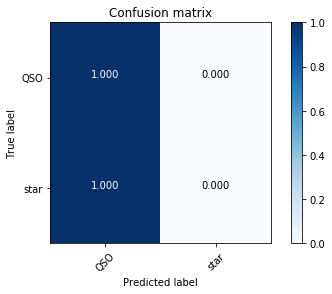

In [200]:
plot_confusion_matrix(metrics.confusion_matrix(np.array(yt_test), y_pred, le.transform(["QSO", "star"])), ["QSO", "star"], normalize=True)

(-2, 6)

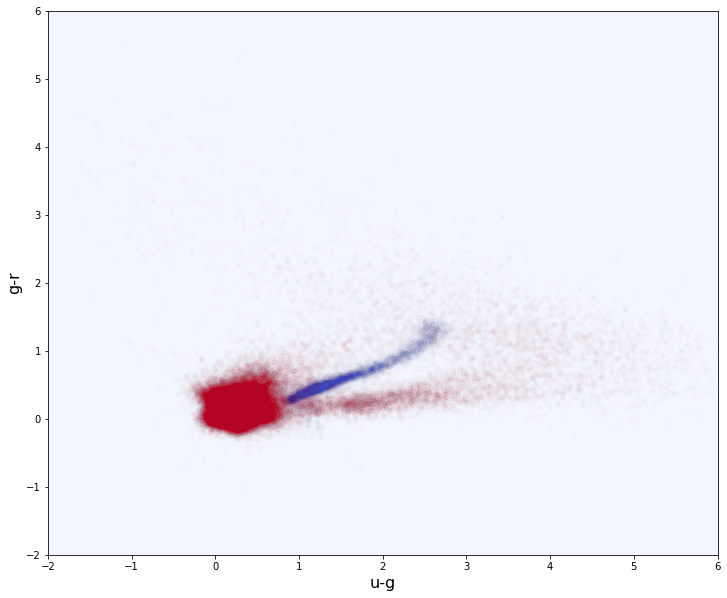

In [201]:
fig, ax = plt.subplots(figsize = (12, 10))
xx, yy = make_meshgrid(data["u-g"], data["g-r"])
plot_contours_lgm(ax, bst, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.1)
ax.scatter(data["u-g"], data["g-r"], c=(data.cat=='QSO'), cmap=plt.cm.coolwarm, s=20, edgecolors=None, alpha = 0.01)
ax.set_xlabel("u-g", fontsize=16)
ax.set_ylabel("g-r", fontsize=16)
ax.set_xlim(-2, 6)
ax.set_ylim(-2, 6)

Confusion matrix with resampling

Normalized confusion matrix


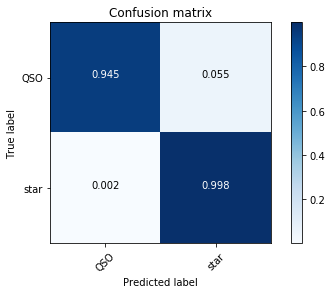

In [202]:
plot_confusion_matrix(metrics.confusion_matrix(np.array(yt_test), y_pred_resampled, le.transform(["QSO", "star"])), ["QSO", "star"], normalize=True)

(-2, 6)

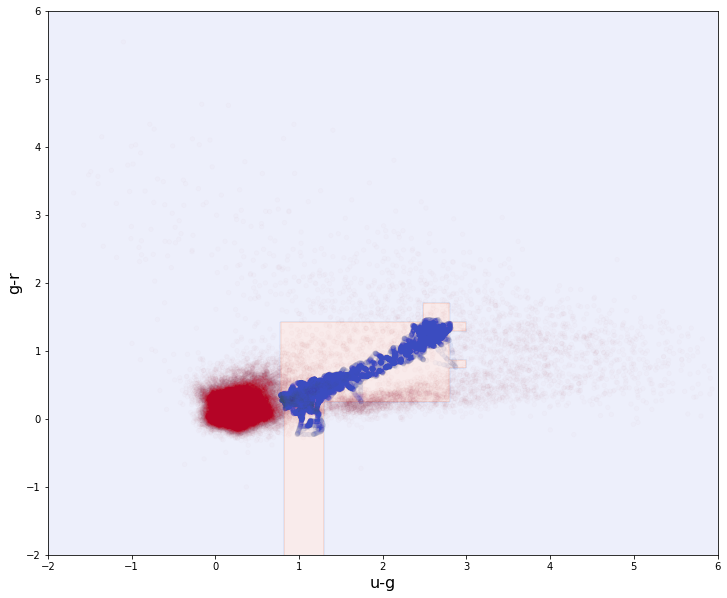

In [203]:
fig, ax = plt.subplots(figsize = (12, 10))
xx, yy = make_meshgrid(data_resampled["u-g"], data_resampled["g-r"])
plot_contours_lgm(ax, bst_resampled, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.1)
ax.scatter(data_resampled["u-g"], data_resampled["g-r"], c=(data_resampled.cat=='QSO'), cmap=plt.cm.coolwarm, s=20, edgecolors=None, alpha = 0.01)
ax.set_xlabel("u-g", fontsize=16)
ax.set_ylabel("g-r", fontsize=16)
ax.set_xlim(-2, 6)
ax.set_ylim(-2, 6)